In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-09-28 15:56:35--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-09-28 15:56:35 (4.51 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [4]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
dataset['sex'].replace(['male','female'],[0,1],inplace=True)
dataset['smoker'].replace(['no','yes'],[0,1],inplace=True)
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,0,31.0,3,0,northwest,10600.55
1334,18,1,31.9,0,0,northeast,2205.98
1335,18,1,36.9,0,0,southeast,1629.83
1336,21,1,25.8,0,0,southwest,2007.95
1337,61,1,29.1,0,1,northwest,29141.36


In [6]:
dataset=pd.get_dummies(dataset)
dataset.tail()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,0,31.0,3,0,10600.55,0,1,0,0
1334,18,1,31.9,0,0,2205.98,1,0,0,0
1335,18,1,36.9,0,0,1629.83,0,0,1,0
1336,21,1,25.8,0,0,2007.95,0,0,0,1
1337,61,1,29.1,0,1,29141.36,0,1,0,0


In [7]:
x=dataset.drop(['expenses'],axis=1)
y=dataset['expenses']
train_dataset,test_dataset,train_labels,test_labels=train_test_split(x,y,train_size=0.2,random_state=12)

In [8]:
model=RandomForestRegressor()
model.fit(train_dataset,train_labels)
pred_labels=model.predict(test_dataset)
print(mean_absolute_error(test_labels,pred_labels))

3153.7419913165254


Testing set Mean Abs Error: 3153.74 expenses
You passed the challenge. Great job!


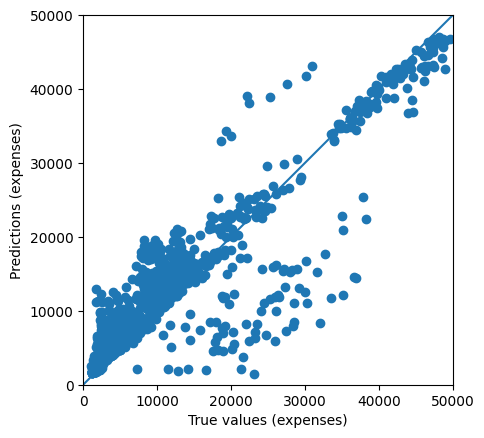

In [9]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
#loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)
mae=mean_absolute_error(test_labels,pred_labels)
print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
